In [113]:
import yfinance as yf
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [4]:
btc_data = yf.download("BTC-USD", start="2020-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
btc_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+00:00,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02 00:00:00+00:00,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03 00:00:00+00:00,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04 00:00:00+00:00,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05 00:00:00+00:00,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2022-12-28 00:00:00+00:00,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2022-12-29 00:00:00+00:00,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479


In [42]:
plt.figure(figsize=(12, 10))

fig = go.Figure(
    data=[
        go.Candlestick(
            x=btc_data.index,
            open=btc_data["Open"],
            high=btc_data["High"],
            low=btc_data["Low"],
            close=btc_data["Close"],
        )
    ]
)

fig.update_layout(
    title="Candlestick Chart for Bitcoin",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    xaxis_rangeslider_visible=False,
)

fig.update_layout(width=1300, height=600)

fig.show()

<Figure size 1200x1000 with 0 Axes>

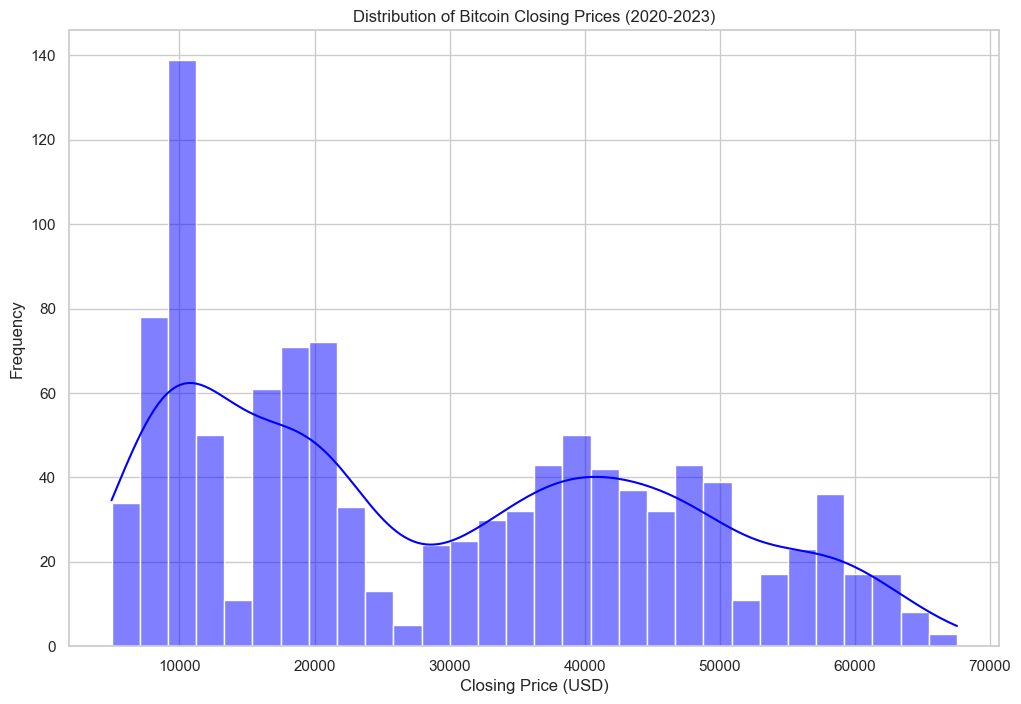

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.histplot(btc_data["Close"], kde=True, color="blue", bins=30)
plt.title("Distribution of Bitcoin Closing Prices (2020-2023)")
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.show()

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Date", y="Open", data=btc_data, palette=["blue", "orange"])
plt.title("Boxplot of Bitcoin Opening and Closing Prices Over Time")
plt.xlabel("Price Type")
plt.ylabel("Price (USD)")
plt.show()

ValueError: Could not interpret input 'Date'

<Figure size 1200x600 with 0 Axes>

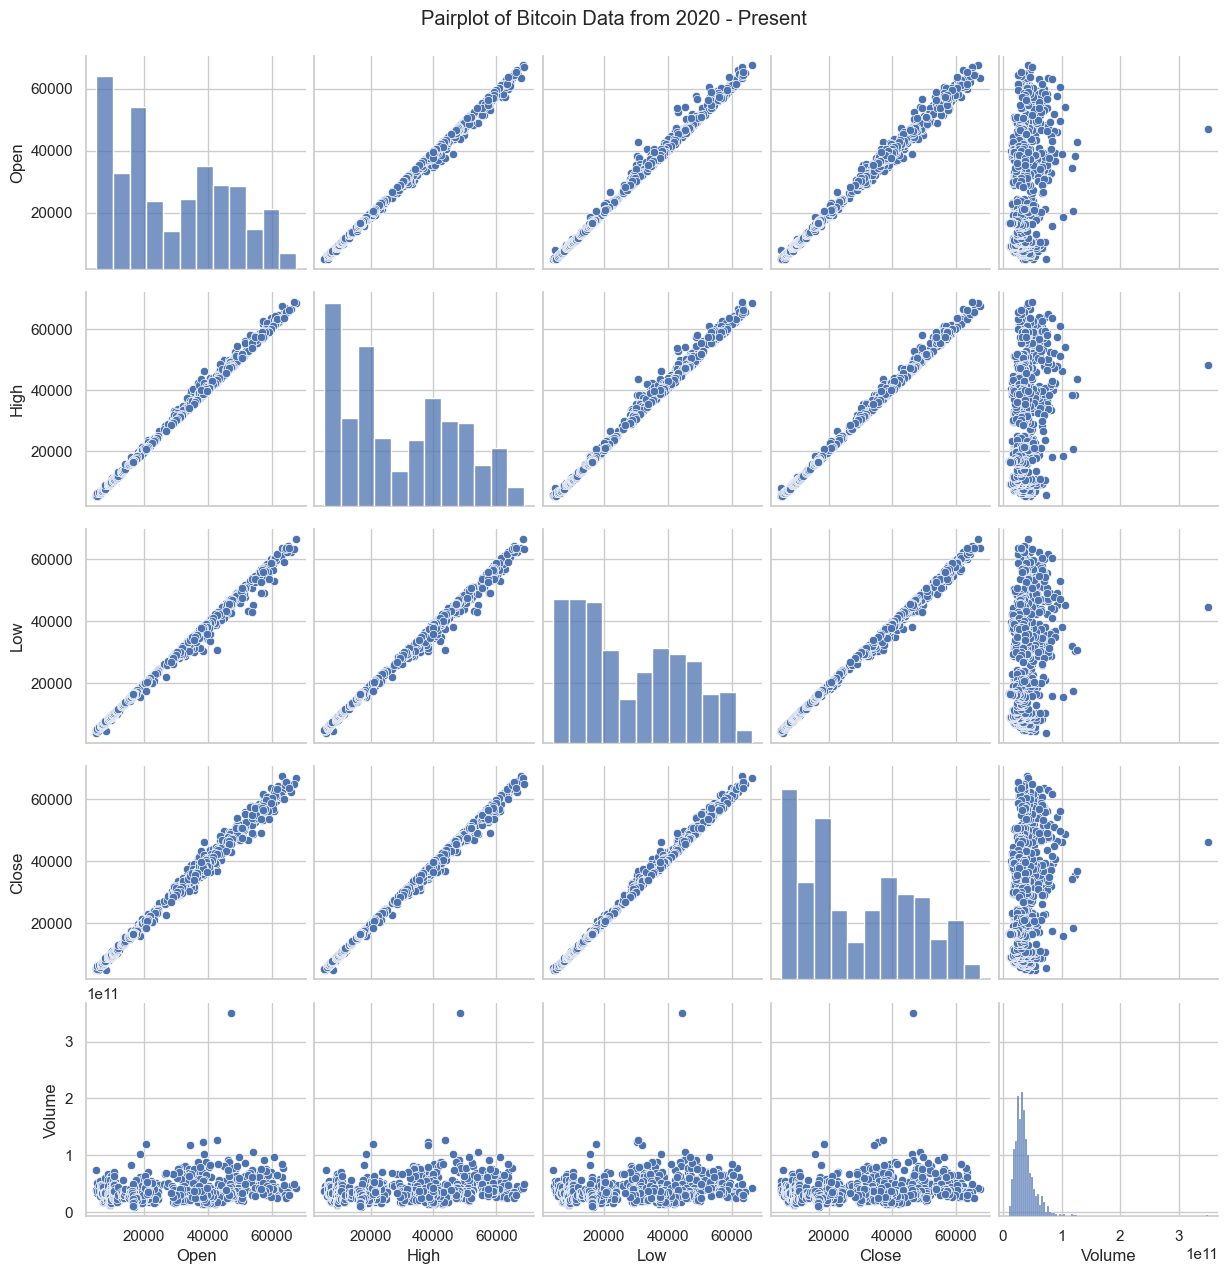

In [18]:
numeric_features = btc_data[["Open", "High", "Low", "Close", "Volume"]]
sns.pairplot(numeric_features)
plt.suptitle("Pairplot of Bitcoin Data from 2020 - Present", y=1.02)
plt.show()

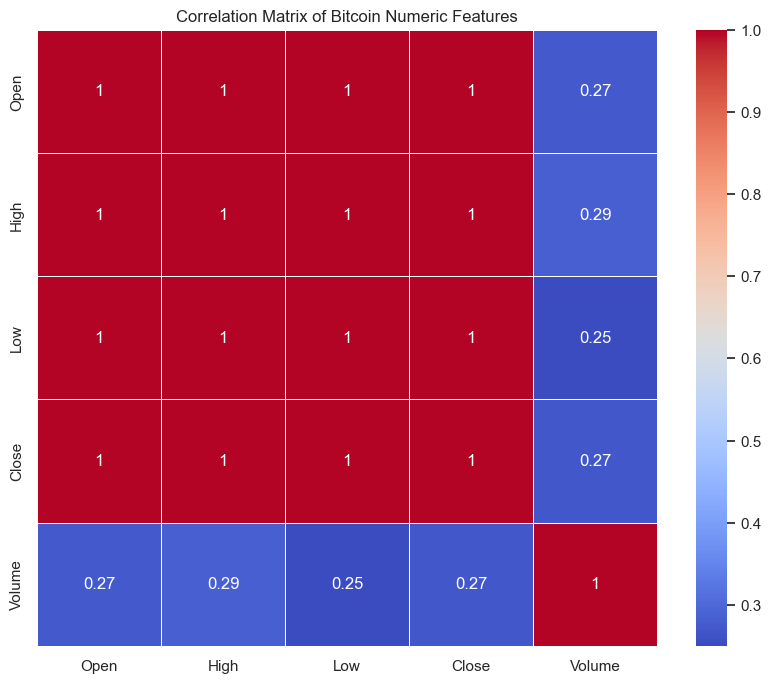

In [17]:
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Bitcoin Numeric Features")
plt.show()

Text(0.5, 1.0, 'BTC Price performance Year over Year')

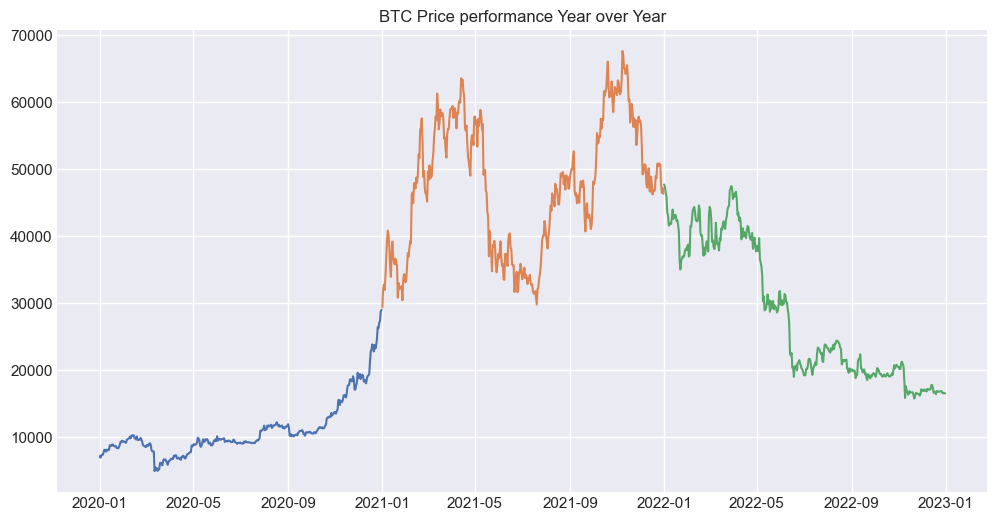

In [48]:
years = btc_data.index.year.unique()

plt.figure(figsize=(12, 6))

for year in years:
    data_year = btc_data[btc_data.index.year == year]
    plt.plot(data_year.index, data_year["Close"], label=f"Year {year}")

plt.title("BTC Price performance Year over Year")

In [115]:
btc_data.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=1096)

In [124]:
gold_data = yf.download("GLD", start="2020-01-01", end="2023-01-01")

combined_data = pd.concat([btc_data["Close"], gold_data["Close"]], axis=1)
combined_data.columns = ["BTC Price Close", "Gold Price Close"]

fig = px.line(
    combined_data,
    x=combined_data.index,
    y=["BTC Price Close", "Gold Price Close"],
    title="BTC price correlation to Gold (XAU)",
)

fig.add_scatter(
    x=gold_data.index, y=gold_data["Close"], mode="lines", name="Gold Close Price"
)

fig.update_layout(xaxis_title="Date", yaxis_title="Price (USD)")

fig.show()

[*********************100%***********************]  1 of 1 completed
